# CE-40959: Deep Learning

# HW3. Part 3. CNN on CIFAR (20 + 10 points)

### Deadline:   16 Farvardin

In this problem, we will train a CNN on CIFAR-10 database. Next, we will go through the network and visualize its layers to see what is happening there. Then, we use the trained model in a Transfer Learning approach to classifying the CIFAR-100 database.

Let's start with loading data. First load the data by runing the code below:

In [2]:
from load_data import load_cifar10 #this function provided in the attached file loads the data of CIFAR10 database

def load_cifar10_data():
    dataset_dir = 'data/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_cifar10(dataset_dir)
    X_train, X_val = X_train[:45000], X_train[45000:]
    y_train, y_val = y_train[:45000], y_train[45000:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train shape: (45000, 32, 32, 3)
y_train shape: (45000, 1)
X_val shape: (5000, 32, 32, 3)
y_val shape: (5000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


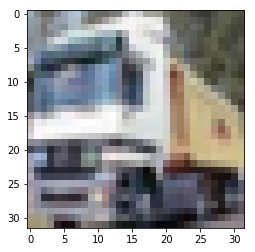

In [34]:
# IMPORTANT: I used google colab dataloader. uncomment the below line in case you want to use something else
# X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10_data()

# comment the following lines if you dont use colab
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val = X_train[:45000], X_train[45000:]
y_train, y_val = y_train[:45000], y_train[45000:]

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

%matplotlib inline
import matplotlib.pyplot as plt
# print(X_train[1].shape)
plt.imshow(X_train[1])#represnting a sample data from CIFAR-10
plt.show()

By successfully runing the above code, you have loaded the data and also you can see a sample data from CIFAR-10.

The below code will convert the labels to one-hot codes which will be later used for the classification.

In [35]:
import numpy as np

from sklearn.preprocessing import OneHotEncoder # this function is used to prepare one-hot encoded labels
encoder = OneHotEncoder(sparse=False)

encoder.fit(y_train)#this line will fit 'encoder' to encode the labels

y_train_onehot = encoder.transform(y_train)# encoding train labels (one-hot coding)
y_val_onehot   = encoder.transform(y_val)  # encoding train labels (one-hot coding)
y_test_onehot  = encoder.transform(y_test) # encoding test  labels (one-hot coding)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


The function below is for converting data to several batches which we will use in training.

In [0]:
def make_batches(x, y, batch_size):
    n = len(y)
    steps = n // batch_size
    if n % batch_size != 0:
        steps += 1
    x_batches = np.array_split(x, steps)
    y_batches = np.array_split(y, steps)
    return x_batches, y_batches

## Part1: Trainig a CNN (15 pts.)

In this part, we are going to train a Convolutional Neural Network (CNN) with the below structure:

1. 16 * conv(5,5), activation function =ReLU
2. 16 * conv(5,5), activation function =ReLU
3. Max-pooling(3,3), stride=(2,2)
4. 32 * conv(5,5), activation function =ReLU
5. 32 * conv(5,5), activation function =ReLU
6. Max-pooling(3,3), stride=(2,2)
7. 64 * conv(5,5), activation function =ReLU
8. FC(128), activation function =ReLU
9. FC(128), activation function =ReLU
10. FC(10), activation function =softmax

Let's go to implement the model in the below box. Note that using **tf.layers** is **NOT ALLOWED** in this homework.

In [0]:
import tensorflow as tf

# seed 42: test_acc: 0.67
tf.set_random_seed(42)

tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 32, 32, 3]) # placeholder for input data
y = tf.placeholder(tf.float32, [None, 10])# placeholder for labels (one-hot encoded)

###################################################################
#########  TODO: Your code for implementing the network ###########
###################################################################

# Define the needed Variables here:
# e.g., W_conv1 has the shape of shape=[5, 5, 3, 16] and B_conv1 has the shape of shape=[16]
W_conv1 = tf.Variable(tf.random.normal(shape=[5, 5, 3, 16], mean=0.0, stddev=0.01))
B_conv1 = tf.Variable(tf.zeros(shape=[16]))

W_conv2 = tf.Variable(tf.random.normal(shape=[5, 5, 16, 16], mean=0.0, stddev=0.01))
B_conv2 = tf.Variable(tf.zeros(shape=[16]))

W_conv4 = tf.Variable(tf.random.normal(shape=[5, 5, 16, 32], mean=0.0, stddev=0.01))
B_conv4 = tf.Variable(tf.zeros(shape=[32]))

W_conv5 = tf.Variable(tf.random.normal(shape=[5, 5, 32, 32], mean=0.0, stddev=0.01))
B_conv5 = tf.Variable(tf.zeros(shape=[32]))

W_conv7 = tf.Variable(tf.random.normal(shape=[5, 5, 32, 64], mean=0.0, stddev=0.01))
B_conv7 = tf.Variable(tf.zeros(shape=[64]))

W_fc8 = tf.Variable(tf.random.normal(shape=[8*8*64, 128], mean=0.0, stddev=0.01))
B_fc8 = tf.Variable(tf.zeros(shape=[128]))

W_fc9 = tf.Variable(tf.random.normal(shape=[128, 128], mean=0.0, stddev=0.01))
B_fc9 = tf.Variable(tf.zeros(shape=[128]))

W_fc10 = tf.Variable(tf.random.normal(shape=[128, 10], mean=0.0, stddev=0.01))
B_fc10 = tf.Variable(tf.zeros(shape=[10]))

# Define the layers here:
conv1 = tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + B_conv1
conv1_relu = tf.nn.relu(conv1)

conv2 = tf.nn.conv2d(conv1_relu, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + B_conv2
conv2_relu = tf.nn.relu(conv2)

pooling3 = tf.nn.max_pool(conv2_relu, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')

conv4 = tf.nn.conv2d(pooling3, W_conv4, strides=[1, 1, 1, 1], padding='SAME') + B_conv4
conv4_relu = tf.nn.relu(conv4)

conv5 = tf.nn.conv2d(conv4_relu, W_conv5, strides=[1, 1, 1, 1], padding='SAME') + B_conv5
conv5_relu = tf.nn.relu(conv5)

pooling6 = tf.nn.max_pool(conv5_relu, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')

conv7 = tf.nn.conv2d(pooling6, W_conv7, strides=[1, 1, 1, 1], padding='SAME') + B_conv7
conv7_relu = tf.nn.relu(conv7)

# flatten = tf.reshape(conv7_relu, (conv7_relu.shape[0], -1))
conv7_relu_shape = conv7_relu.get_shape().as_list()
flatten = tf.reshape(conv7_relu, [-1, conv7_relu_shape[1]*conv7_relu_shape[2]*conv7_relu_shape[3]])
# flatten = tf.reshape(conv7_relu, (64, -1))

fc8 = tf.add(tf.matmul(flatten, W_fc8), B_fc8)
fc8_relu = tf.nn.relu(fc8)

fc9 = tf.add(tf.matmul(fc8_relu, W_fc9), B_fc9)
fc9_relu = tf.nn.relu(fc9)


logits = tf.add(tf.matmul(fc9_relu, W_fc10), B_fc10)
y_hat = tf.nn.softmax(logits)

# print(flatten.shape[0])


# continue the same for other layers:
    
    
    
# Don't forget that:
# - you need to define variables with needed size and suitable initialization,
# - you need to use tf.nn.conv2d to implement convolution,
# - you need to use tf.nn.max_pool to implement max_pooling,

# Help: your network output is something like: y_hat = tf.nn.softmax(logits) where logits are values of last layer 
#       before softmax activation function.
#############################################################

Now you need to define an optimizer. You are free to use any optimizer. You can change optimizer or learning rate if you want :)

In [0]:
############ Cross entropy loss ############################
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))
# Note: logits in the above line is the last layer values (a 10-neuron layer) before the softmax activation function. 
#       In other words, you may have written y_hat = tf.nn.softmax(logits) in the above box in which y_hat is the output
#       of the network.

############ Adam optimizer ################################
lr = 1e-4 # learning rate
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
trainer = optimizer.minimize(cross_entropy + 0.0005 * (tf.nn.l2_loss(W_conv1) + tf.nn.l2_loss(W_conv2)+ tf.nn.l2_loss(W_fc8) + tf.nn.l2_loss(W_fc9)))

############################################################
#            TODO: Implement Accuracy                      #
############################################################
batch_preds = tf.argmax(y_hat, axis=1)
correct_preds = tf.argmax(y, axis=1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(batch_preds, correct_preds), tf.float32))
# Note: The defined accuray does not play any role in the optimization process. However, it is a mtric which we can 
#       use as a log for mintoring training process with more metrics rather than a single loss function.
############################################################

You can go for the rest of the job, handle the Session and go for training. 
You can use tensorboard or the code provided in the next box to plot for loss and accuracy of training and validation data.
You are expected to achieve at least 60% accuracy on the test data after the training process. Good Luck! ;)

In [40]:
########## Training ##########
batch_size = 64 # You are free to change it
x_train_batches, y_train_batches = make_batches(X_train, y_train_onehot, batch_size)
epochs = 50  # You are free to change it
N_Batches = len(x_train_batches)

train_acc  = np.zeros(epochs)
train_loss = np.zeros(epochs)
val_acc  = np.zeros(epochs)
val_loss = np.zeros(epochs)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(epochs):
        print()
        print("*" * 10, "Epoch %3i"%epoch, "*" * 10)

        batch_acc = np.zeros(N_Batches)
        batch_loss = np.zeros(N_Batches)
        for n in range(N_Batches):
            _, batch_acc[n], batch_loss[n] = sess.run([trainer, accuracy, cross_entropy],
                                                      {x: x_train_batches[n], y: y_train_batches[n]})
            #print("Batch %3d/%d: Acc:%0.4f , Loss:%0.4f"%(n, N_Batches, batch_acc[n], batch_loss[n]))

        train_acc[epoch] = np.mean(batch_acc)
        train_loss[epoch] = np.mean(batch_loss)
        print("Train:\t\tAccuracy= %0.4f \tLoss= %0.4f"%(train_acc[epoch], train_loss[epoch]))

        ########## Validation ##########
        val_acc[epoch], val_loss[epoch] = sess.run([accuracy, cross_entropy],
                                                   {x: X_val, y: y_val_onehot})
        print("Validation:\tAccuracy= %0.4f \tLoss= %0.4f"%(val_acc[epoch], val_loss[epoch]))
    test_acc, test_loss = sess.run([accuracy, cross_entropy],{x: X_test, y: y_test_onehot})
    
    # save the weights
    w_conv1_CIFAR10 = sess.run(W_conv1)
    b_conv1_CIFAR10 = sess.run(B_conv1)
    w_conv2_CIFAR10 = sess.run(W_conv2)
    b_conv2_CIFAR10 = sess.run(B_conv2)
    w_conv4_CIFAR10 = sess.run(W_conv4)
    b_conv4_CIFAR10 = sess.run(B_conv4)
    w_conv5_CIFAR10 = sess.run(W_conv5)
    b_conv5_CIFAR10 = sess.run(B_conv5)
    w_conv7_CIFAR10 = sess.run(W_conv7)
    b_conv7_CIFAR10 = sess.run(B_conv7)
    w_fc8_CIFAR10 = sess.run(W_fc8)
    b_fc8_CIFAR10 = sess.run(B_fc8)
    
    
    
############################################################
#            TODO: Implement Test Phase                    #
############################################################
# test_acc, test_loss = sess.run([accuracy, cross_entropy],{x: X_test, y: y_test_onehot})
print("Test:\tAccuracy= %0.4f \tLoss= %0.4f"%(test_acc, test_loss))
############################################################


********** Epoch   0 **********
Train:		Accuracy= 0.2530 	Loss= 1.9930
Validation:	Accuracy= 0.3166 	Loss= 1.8201

********** Epoch   1 **********
Train:		Accuracy= 0.3664 	Loss= 1.7118
Validation:	Accuracy= 0.3938 	Loss= 1.6445

********** Epoch   2 **********
Train:		Accuracy= 0.4182 	Loss= 1.5760
Validation:	Accuracy= 0.4376 	Loss= 1.5517

********** Epoch   3 **********
Train:		Accuracy= 0.4548 	Loss= 1.4870
Validation:	Accuracy= 0.4774 	Loss= 1.4566

********** Epoch   4 **********
Train:		Accuracy= 0.4847 	Loss= 1.4134
Validation:	Accuracy= 0.5074 	Loss= 1.3799

********** Epoch   5 **********
Train:		Accuracy= 0.5120 	Loss= 1.3384
Validation:	Accuracy= 0.5412 	Loss= 1.2858

********** Epoch   6 **********
Train:		Accuracy= 0.5441 	Loss= 1.2614
Validation:	Accuracy= 0.5716 	Loss= 1.2029

********** Epoch   7 **********
Train:		Accuracy= 0.5710 	Loss= 1.1916
Validation:	Accuracy= 0.5930 	Loss= 1.1435

********** Epoch   8 **********
Train:		Accuracy= 0.5919 	Loss= 1.1303
Validati

### Training Diagram

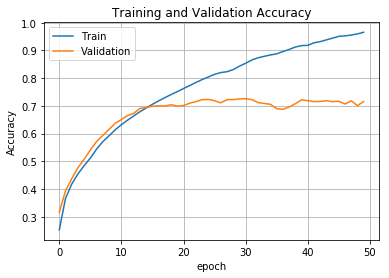

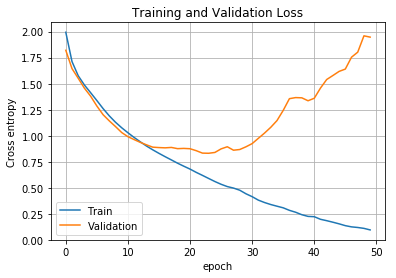

In [41]:
########## Plot metrics #########################
fig = plt.figure()
plt.plot(range(epochs), train_acc, label='Train')
plt.plot(range(epochs), val_acc, label='Validation')
plt.title("Training and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc=0)
plt.show()

fig = plt.figure()
plt.plot(range(epochs), train_loss, label='Train')
plt.plot(range(epochs), val_loss, label='Validation')
plt.title("Training and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Cross entropy")
plt.grid(True)
plt.legend(loc=0)
plt.show()

## Part2: Visualizing the Network (5 pts.)

Now, we want to check the weights to see how the network realy works and what it does. Consider the wieghts of the first convolutional layer, find its weights values and print the values of 2 arbitrary filters:

In [42]:
##########################################################################
# TODO                                                                   #
# Note: To retrieve the values of the weight-variables from TensorFlow,  #
#       feed-dict is not necessary because                               #
#       nothing is calculated.                                           #
#       e.g., w = sess.run(weights)                                      #
##########################################################################

print("Filter 1:")
print(np.linalg.norm(w_conv1_CIFAR10[:,:,0,0]))
print(np.linalg.norm(w_conv1_CIFAR10[:,:,0,1]))
print(np.linalg.norm(w_conv1_CIFAR10[:,:,0,2]))
print(w_conv1_CIFAR10[:,:,0,0])
print(w_conv1_CIFAR10[:,:,1,0])
print(w_conv1_CIFAR10[:,:,2,0])

print("Filter 10:")
print(w_conv1_CIFAR10[:,:,0,9])
print(w_conv1_CIFAR10[:,:,1,9])
print(w_conv1_CIFAR10[:,:,2,9])

##########################################################################

Filter 1:
0.10027074
0.09376002
0.1666923
[[ 0.02117966  0.00339012  0.02323322 -0.00116835  0.00285003]
 [ 0.03674196  0.02160827  0.01635983  0.02096791  0.00609227]
 [ 0.0414154   0.03263996  0.0271133  -0.0010002   0.00478316]
 [ 0.02715895  0.02674837  0.02186525 -0.0143199   0.01178217]
 [ 0.00920603  0.01205144  0.02094045  0.00049157  0.00042583]]
[[ 6.6022985e-03 -2.2467943e-02 -2.7283262e-03 -1.0540558e-02
  -2.4460144e-02]
 [ 2.3518132e-02 -1.5954785e-02 -2.6766675e-02 -4.3449238e-02
  -3.1677693e-02]
 [ 2.8681619e-02  6.2593361e-03 -2.1662999e-02 -5.9152264e-02
  -3.7931751e-02]
 [ 4.9565315e-06  2.5951859e-02 -8.7977769e-03 -5.8084857e-02
  -2.0883515e-02]
 [ 8.0127269e-03 -1.0389249e-02 -1.1425596e-02 -1.9372262e-02
  -1.9615320e-03]]
[[ 0.02058911  0.00957427 -0.00171977 -0.00825722  0.00706188]
 [ 0.03705781 -0.00773597 -0.01705396 -0.05120302 -0.02682249]
 [ 0.04140079  0.01212603 -0.02859741 -0.0441236  -0.02683954]
 [ 0.03408346  0.01397812 -0.00726519 -0.04127291 -0

### Question: Try to interpret what they are doing?

### Answer: 

As the filters are 5*5, it is not that clear what the filters are doing. According to the visualizations done in the next block, the first filter is trying to focus on red color and 10th filter is trying to find an edge between red and blue color.
I ran the code again and the filters changed and my interpretation was based on those values:))
> Indented block



Now let's visualize the filters of the first conv layer. There are lots of ways to code for visualization. You are free to choose any way you want. However below is function which is provided for you to plot the weights.

(5, 5, 3, 16)


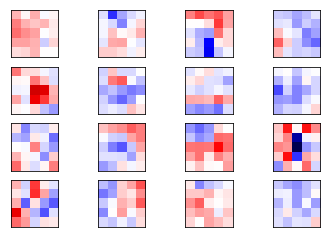

In [43]:
import math
def plot_conv_weights(w, input_channel=0):
    # The argument w is a 4-dim array.(e.g. weights_conv1 with the shape of [5,5,3,64])
    # The argument input_channel shows the specified channel of all filters.
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)
    abs_max = max(abs(w_min), abs(w_max))

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # The format of this 4-dim tensor is determined by the
            # TensorFlow API. See Tutorial #02 for more details.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=-abs_max, vmax=abs_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

    
##########################################################################
# TODO: call the function above or use your own way here                 #
##########################################################################

print(w_conv1_CIFAR10.shape)
plot_conv_weights(w_conv1_CIFAR10)
##########################################################################


### Question: Try to interpret what they are doing?

### Answer: 

Some filters are trying to find edges between colors or finding specific colors in the input image(since it is the first conv layer.)

## Part3: Transfer Learning (+10 pts. - optional)

In all the machine learning problems we need data to train our models. However, the volume of the data might not be sufficient for the considered model. In such cases, we may use a model which is trained on a similar dataset probably for a different objective. Then we transfer to the main problem and fine- tune or replace some parts of the network. 

In this exercise, we are going to implement the transfer learning concept on CNN. For this purpose, we use the network that you have trained on Part 1 of this homework (above) to classify three new classes (i.e. bee, elephant, and fox) on CIFAR-100 dataset. Let's first load the data:

In [0]:
from load_data import load_cifar100 #this function provided in the attached file loads the data of CIFAR100 database

def load_cifar100_data():
    dataset_dir = 'data/cifar-100-python'
    
    X_train, y_train, X_test, y_test = load_cifar100(dataset_dir)
    
    return X_train, y_train, X_test, y_test

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


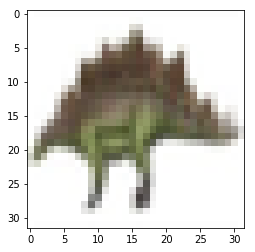

In [44]:
# IMPORTANT: I used google colab dataloader. uncomment the below line in case you want to use something else
# X_train, y_train, X_test, y_test = load_cifar100_data()

# comment the following two lines if you dont use colab
cifar100 = tf.keras.datasets.cifar100
(X_train_TL, y_train_TL), (X_test_TL, y_test_TL) = cifar100.load_data()

print('X_train shape:', X_train_TL.shape)
print('y_train shape:', y_train_TL.shape)
print('X_test shape:', X_test_TL.shape)
print('y_test shape:', y_test_TL.shape)

import matplotlib.pyplot as plt
plt.imshow(X_train_TL[1])#represnting a sample data from CIFAR-100
plt.show()

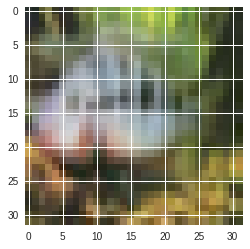

[1]
1500


In [0]:
idx = 4
plt.imshow(X_train_TL[idx])#represnting a sample data from CIFAR-100
plt.show()
print(y_train_TL[idx])
print(selected_images_train.shape[0])

By successfully runing the above code, you have loaded the data and also you can see a sample data from CIFAR-100. The below code will seprate the specified classes (i.e. bee(6), elephant(31), and fox(34)) for the new classification problem.

In [0]:
selected_images_train = np.zeros([1,32,32,3])
selected_labels_train = np.zeros([1,1])
for i in range(50000):
    label = y_train_TL[i]
    if label==6 or label==31 or label==34:
        selected_images_train = np.append(selected_images_train,np.reshape(X_train_TL[i,:,:,:],[1,32,32,3]),axis=0)
        selected_labels_train = np.append(selected_labels_train,np.reshape(label,[1,1]),axis=0)
selected_images_train = selected_images_train[1:]# to remove the first defined np..zeros data
selected_labels_train = selected_labels_train[1:]# to remove the first defined np..zeros data


selected_images_test = np.zeros([1,32,32,3])
selected_labels_test = np.zeros([1,1])
for i in range(10000):
    label = y_test_TL[i]
    if label==6 or label==31 or label==34:
        selected_images_test = np.append(selected_images_test,np.reshape(X_test_TL[i,:,:,:],[1,32,32,3]),axis=0)
        selected_labels_test = np.append(selected_labels_test,np.reshape(label,[1,1]),axis=0)
selected_images_test = selected_images_test[1:]# to remove the first defined np..zeros data
selected_labels_test = selected_labels_test[1:]# to remove the first defined np..zeros data

In [46]:
images_train = selected_images_train[:int(selected_images_train.shape[0]*0.8),:,:,:]
labels_train = selected_labels_train[:int(selected_images_train.shape[0]*0.8),:]

images_validation = selected_images_train[int(selected_images_train.shape[0]*0.8):,:,:,:]
labels_validation = selected_labels_train[int(selected_images_train.shape[0]*0.8):,:]

images_test = selected_images_test
labels_test = selected_labels_test


print('images_train shape:', images_train.shape)
print('labels_train shape:', labels_train.shape)

print('images_validation shape:', images_validation.shape)
print('labels_validation shape:', labels_validation.shape)

print('images_test shape:', images_test.shape)
print('labels_test shape:', labels_test.shape)

images_train shape: (1200, 32, 32, 3)
labels_train shape: (1200, 1)
images_validation shape: (300, 32, 32, 3)
labels_validation shape: (300, 1)
images_test shape: (300, 32, 32, 3)
labels_test shape: (300, 1)


In [47]:
import numpy as np

from sklearn.preprocessing import OneHotEncoder # this function is used to prepare one-hot encoded labels
encoder = OneHotEncoder(sparse=False)

encoder.fit(selected_labels_train)#this line will fit 'encoder' to encode the labels

labels_train_onehot = encoder.transform(labels_train)# encoding train labels (one-hot coding)
labels_val_onehot   = encoder.transform(labels_validation)  # encoding train labels (one-hot coding)
labels_test_onehot  = encoder.transform(labels_test) # encoding test  labels (one-hot coding)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


To implement the transfer learning, we need to use the previous model and transfer it to the new problem. For this end, you need to freeze the convolution layers and also the first fully connected layer which means that they should not be updated in the new training process. For the last two fully connected layers, we want to fine-tune the values. However, you should replace the last layer (output layer) with a 3-neuron layer to represent the score for each class.

There are several methods that you can implement the discussed process with TensorFlow. You are free to do any way you want.
The below code redefine the network and use the weights of the network trained on CIFAR-10. Then, the frozen weights can be defined as either constant or non-trainable variables. Besides, the fine-tuning weights are also defined as variables with their previous weights in the definition. Anyway, since there are other ways to implement this job, you can do it with your own method.

In [0]:
############################################################
#            TODO: Implement Accuracy Part                 #
############################################################

# get the weights form previous network:
# e.g., w_conv1_CIFAR10 = sess.run(W_conv1)


tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 32, 32, 3]) # placeholder for input data
y_new = tf.placeholder(tf.float32, [None, 3])# placeholder for labels (one-hot encoded)

# Re-define the convolutional layers

conv1 = tf.nn.conv2d(x, w_conv1_CIFAR10, strides=[1, 1, 1, 1], padding='SAME') + b_conv1_CIFAR10
conv1_relu = tf.nn.relu(conv1)

conv2 = tf.nn.conv2d(conv1_relu, w_conv2_CIFAR10, strides=[1, 1, 1, 1], padding='SAME') + b_conv2_CIFAR10
conv2_relu = tf.nn.relu(conv2)

pooling3 = tf.nn.max_pool(conv2_relu, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')

conv4 = tf.nn.conv2d(pooling3, w_conv4_CIFAR10, strides=[1, 1, 1, 1], padding='SAME') + b_conv4_CIFAR10
conv4_relu = tf.nn.relu(conv4)

conv5 = tf.nn.conv2d(conv4_relu, w_conv5_CIFAR10, strides=[1, 1, 1, 1], padding='SAME') + b_conv5_CIFAR10
conv5_relu = tf.nn.relu(conv5)

pooling6 = tf.nn.max_pool(conv5_relu, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')

conv7 = tf.nn.conv2d(pooling6, w_conv7_CIFAR10, strides=[1, 1, 1, 1], padding='SAME') + b_conv7_CIFAR10
conv7_relu = tf.nn.relu(conv7)

# flatten = tf.reshape(conv7_relu, (conv7_relu.shape[0], -1))
conv7_relu_shape = conv7_relu.get_shape().as_list()
flatten = tf.reshape(conv7_relu, [-1, conv7_relu_shape[1]*conv7_relu_shape[2]*conv7_relu_shape[3]])
# flatten = tf.reshape(conv7_relu, (64, -1))

fc8 = tf.add(tf.matmul(flatten, w_fc8_CIFAR10), b_fc8_CIFAR10)
fc8_relu = tf.nn.relu(fc8)



# Define weights for the second FC layer (fc1 is already defined in the previous model)
W_fc2_new = tf.Variable(tf.random.normal(shape=[128, 128], mean=0.0, stddev=0.01))
B_fc2_new = tf.Variable(tf.zeros(shape=[128]))
# Define based on the first fully connected layer.
fc2_new = tf.nn.relu(tf.add(tf.matmul(fc8_relu, W_fc2_new), B_fc2_new))

W_fc3_new = tf.Variable(tf.random.normal(shape=[128, 3], mean=0.0, stddev=0.01))
B_fc3_new = tf.Variable(tf.zeros(shape=[3]))
# Define based on the second fully connected layer (fc2_new).
logit = tf.matmul(fc2_new, W_fc3_new) + B_fc3_new
y_hat = tf.nn.softmax(logit)

#############################################################

########## Cross entropy loss ##########
new_cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y_new))

############################################################
#            TODO: Implement the optimizer so that only    #
#                  variales defined above are updated.     #
############################################################
lr = 2*1e-4
new_optimizer = tf.train.AdamOptimizer(learning_rate=lr)
new_trainer = new_optimizer.minimize(new_cross_entropy, var_list=[W_fc2_new, B_fc2_new, W_fc3_new, B_fc3_new])
############################################################

############################################################
#            TODO: Implement Accuracy                      #
############################################################
batch_preds_new = tf.argmax(y_hat, axis=1)
correct_preds_new = tf.argmax(y_new, axis=1)
new_accuracy = tf.reduce_mean(tf.cast(tf.equal(batch_preds_new, correct_preds_new), tf.float32))
############################################################

Now, go for the rest of the job and start training:

In [50]:
########## Training ##########
batch_size = 64 # You are free to change it
x_train_batches, y_train_batches = make_batches(images_train, labels_train_onehot, batch_size)
epochs = 50  # You are free to change it
N_Batches = len(x_train_batches)

train_acc  = np.zeros(epochs)
train_loss = np.zeros(epochs)
val_acc  = np.zeros(epochs)
val_loss = np.zeros(epochs)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        print()
        print("*" * 10, "Epoch %3i"%epoch, "*" * 10)

        batch_acc = np.zeros(N_Batches)
        batch_loss = np.zeros(N_Batches)
        for n in range(N_Batches):
            _, batch_acc[n], batch_loss[n] = sess.run([new_trainer, new_accuracy, new_cross_entropy],
                                                      {x: x_train_batches[n], y_new: y_train_batches[n]})
            #print("Batch %3d/%d: Acc:%0.4f , Loss:%0.4f"%(n, N_Batches, batch_acc[n], batch_loss[n]))

        train_acc[epoch] = np.mean(batch_acc)
        train_loss[epoch] = np.mean(batch_loss)
        print("Train:\t\tAccuracy= %0.4f \tLoss= %0.4f"%(train_acc[epoch], train_loss[epoch]))

        ########## Validation ##########
        val_acc[epoch], val_loss[epoch] = sess.run([new_accuracy, new_cross_entropy],
                                                   {x: images_validation, y_new: labels_val_onehot})
        print("Validation:\tAccuracy= %0.4f \tLoss= %0.4f"%(val_acc[epoch], val_loss[epoch]))
        
############################################################
#            TODO: Implement Test Phase                    #
############################################################
...
print("Test:\tAccuracy= %0.4f \tLoss= %0.4f"%(test_acc, test_loss))
############################################################


********** Epoch   0 **********
Train:		Accuracy= 0.5202 	Loss= 1.0027
Validation:	Accuracy= 0.6433 	Loss= 0.8932

********** Epoch   1 **********
Train:		Accuracy= 0.6342 	Loss= 0.8452
Validation:	Accuracy= 0.6533 	Loss= 0.8015

********** Epoch   2 **********
Train:		Accuracy= 0.6759 	Loss= 0.7519
Validation:	Accuracy= 0.6833 	Loss= 0.7579

********** Epoch   3 **********
Train:		Accuracy= 0.6951 	Loss= 0.6981
Validation:	Accuracy= 0.6867 	Loss= 0.7398

********** Epoch   4 **********
Train:		Accuracy= 0.7125 	Loss= 0.6620
Validation:	Accuracy= 0.7000 	Loss= 0.7328

********** Epoch   5 **********
Train:		Accuracy= 0.7259 	Loss= 0.6331
Validation:	Accuracy= 0.7100 	Loss= 0.7301

********** Epoch   6 **********
Train:		Accuracy= 0.7334 	Loss= 0.6076
Validation:	Accuracy= 0.7167 	Loss= 0.7293

********** Epoch   7 **********
Train:		Accuracy= 0.7451 	Loss= 0.5840
Validation:	Accuracy= 0.7233 	Loss= 0.7295

********** Epoch   8 **********
Train:		Accuracy= 0.7593 	Loss= 0.5615
Validati

You can use tensorboard or the code provided in the next box to plot for loss and accuracy of training and validation data. You are expected to achieve at least 80% accuracy on the test data after training. Good Luck! ;)

### Training Diagram

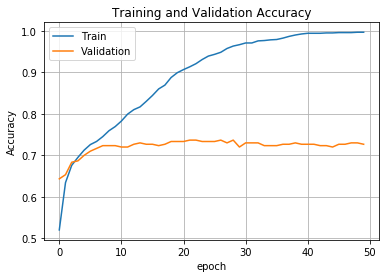

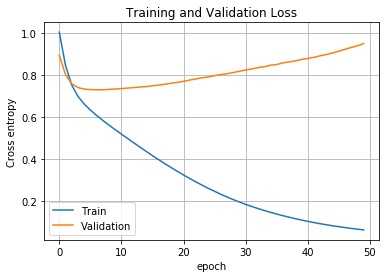

In [51]:
########## Plot metrics #########################
fig = plt.figure()
plt.plot(range(epochs), train_acc, label='Train')
plt.plot(range(epochs), val_acc, label='Validation')
plt.title("Training and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc=0)
plt.show()

fig = plt.figure()
plt.plot(range(epochs), train_loss, label='Train')
plt.plot(range(epochs), val_loss, label='Validation')
plt.title("Training and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Cross entropy")
plt.grid(True)
plt.legend(loc=0)
plt.show()